План работ
Часть 1. Подготовка данных к анализу

Загрузить данные из таблиц, провести первичный анализ
Оптимизировать данные для анализа (поиск дублей, анализ пропусков, проверка названий столбцов и т.п.)
Проверка/корректировка типов данных

Часть 2. Приоритизация гипотез.

Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Часть 3. Анализ A/B-теста

Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
Построить точечный график стоимостей заказов. Сделать выводы и предположения.
Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
Часть 4. Статистическая значимость

Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
Принять решение по результатам теста и объяснить его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Часть №1: Подготовка данных к анализу.


In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
import numpy as np 
import datetime as dt

# для отображения в jupiter всех колонок и столбцов df + сокращу количество цифр после запятой
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision',2)

In [2]:
#открываем и сохраняем как датафрейм файл с данными:
try:
    # personal path
    hypothesis, orders, visitors = (
                            pd.read_csv('hypothesis.csv'),
                            pd.read_csv('orders.csv'),
                            pd.read_csv('visitors.csv')
                            )
except:
    # Yandex path
    hypothesis, orders, visitors = (
                            pd.read_csv('/datasets/hypothesis.csv'),
                            pd.read_csv('/datasets/orders.csv'),
                            pd.read_csv('/datasets/visitors.csv')
                            )

In [3]:
display(hypothesis.head())
display(hypothesis.info())
display(hypothesis.describe())
print('Количество дублей:', hypothesis.duplicated().sum())
        


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


Количество дублей: 0


In [4]:
# поменяем регистр заголовков
hypothesis_columns = (hypothesis.columns).str.lower()
hypothesis.columns=hypothesis_columns
hypothesis.sample()


,hypothesis,reach,impact,confidence,efforts
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3


In [5]:
display(orders.head())
display(orders.info())
display(orders.describe())
print('Количество дублей:', orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.20e+03,1.20e+03,1.20e+03
mean,2.16e+09,2.17e+09,8.35e+03
std,1.23e+09,1.24e+09,3.92e+04
min,1.06e+06,5.11e+06,5.00e+01
25%,1.17e+09,1.11e+09,1.22e+03
50%,2.15e+09,2.22e+09,2.98e+03
75%,3.24e+09,3.18e+09,8.29e+03
max,4.29e+09,4.28e+09,1.29e+06


Количество дублей: 0


In [6]:
# сразу поменяем формат даты на корректный
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
display(visitors.head())
display(visitors.info())
display(visitors.describe())
print('Количество дублей:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


Количество дублей: 0


In [8]:
#visitors['date'] = pd.to_datetime(visitors['date'])
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные загружены и подготовлены. Были изменены форматы данных,а так же приведение колонок к хорошему стилю.


Часть 2. Приоритизация гипотез.


Определим приорите гипотез с пощью ICE&RICE.


In [9]:
hypothesis['ICE'] = (hypothesis['impact'] *  hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False, inplace=True)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


В приорите гипотезы под номером: 8,0,7


In [10]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] *  hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False, inplace=True)
hypothesis 

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


По полученным данным сделаем следущий вывод

Вывод:
По RICE, приоритет гипотез под номером 7,2,0.
По 8, можно сказать, что она не попала в приоритет из-за охвата ввиде 1.


Измененный Вывод:

ICE — это вариация RICE, где отдельно не выделяют R (Reach), считая его компонентом I (Impact). Это имеет смысл с точки зрения бизнеса. Например, если фича затрагивает небольшой процент наиболее лояльных пользователей, Reach (охват) будет низким, тогда как Impact (влияние) будет больши́м.

Часть №3. Анализ A/B теста.

Изучаю количество заказов и посещений в каждой из групп.

In [11]:
print ('Количество посещений в группе А -', visitors.query('group == "A"')['visitors'].sum())
print ('Количество посещений в группе B -',visitors.query('group == "B"')['visitors'].sum())
print('-----------------------------------')
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество посещений в группе А - 18736
Количество посещений в группе B - 18916
-----------------------------------
Количество заказов в группе А - 557
Количество заказов в группе B - 640


В группе В на 180 посещений больше, чем в группе А. Проверим не попали ли некоторые пользователи в разные группы

In [12]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']

In [13]:
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA)& orders['visitorId'].isin(visitorsB),'visitorId'].unique()

Почистим таких пользователей из заказов!


In [14]:
#До
(orders.groupby('visitorId')['group'].nunique()>1).count()

1031

In [15]:
#После 
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]
(orders.groupby('visitorId')['group'].nunique()>1).count()

973

In [16]:
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество заказов в группе А - 468
Количество заказов в группе B - 548


Теперь разница заказов между группами уменьшилась до 80, однако в процентом соотношение разница увеличилась. Поделать с этим мы сейчас ничего не можем, учтем на будущее и продолжим как есть...

Подготовим таблицу с куммулятивными данными по выручке и посещениям

In [17]:
dates_groups = orders[['date','group']].drop_duplicates()

In [18]:
orders_aggregated = (dates_groups
                     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                                            , orders['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionId':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))

In [19]:
orders_aggregated.rename(columns={'transactionId':'orders'}, inplace=True)

In [20]:
orders_aggregated.head()


,date,group,revenue,orders
55,2019-08-01,A,142779,23
66,2019-08-01,B,59758,17
175,2019-08-02,A,234381,42
173,2019-08-02,B,221801,40
291,2019-08-03,A,346854,66


In [21]:
visitors_aggregated = (dates_groups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                            , visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [22]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date','group'])
cumulative_data.head()

,date,group,revenue,orders,visitors
0,2019-08-01,A,142779,23,719
1,2019-08-01,B,59758,17,713
2,2019-08-02,A,234381,42,1338
3,2019-08-02,B,221801,40,1294
4,2019-08-03,A,346854,66,1845


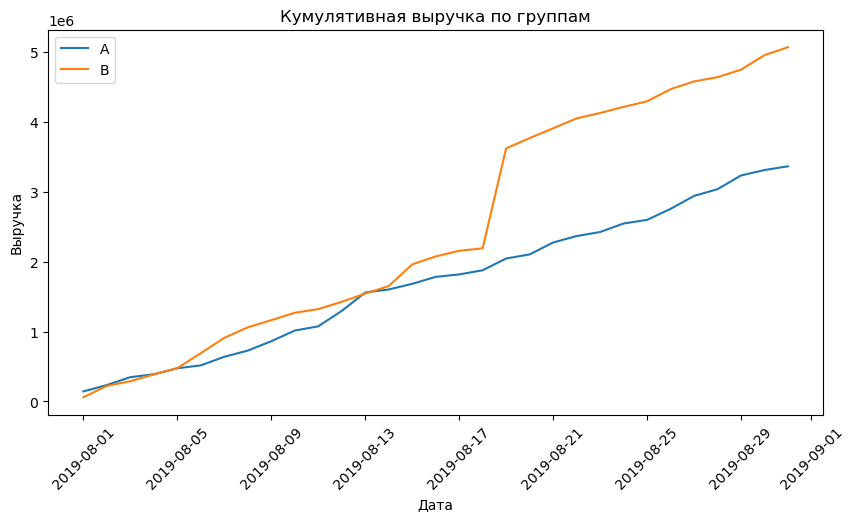

In [23]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # обработка FutureWarning 
# Построим график кумулятивной выручки по группам, предварительно изучив количество заказов в каждой из групп
cumulative_a = cumulative_data.loc[cumulative_data['group'] == 'A',['date','revenue','orders','visitors']]
cumulative_b = cumulative_data.loc[cumulative_data['group'] == 'B',['date','revenue','orders','visitors']]

plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

Группа А растет постепенно, в то время как в В есть резкий рост после 17.08

Вероятно, там закрались очень большие покупки. Хорошо, что у нас в группе В больше заказов, при отсеивании аномалий мы только выровняем количество участников теста.

Без этого же всплеска группы как буд-то похожи. Будем смотреть дальше, а пока построим график кумулятивного среднего чека по группам.

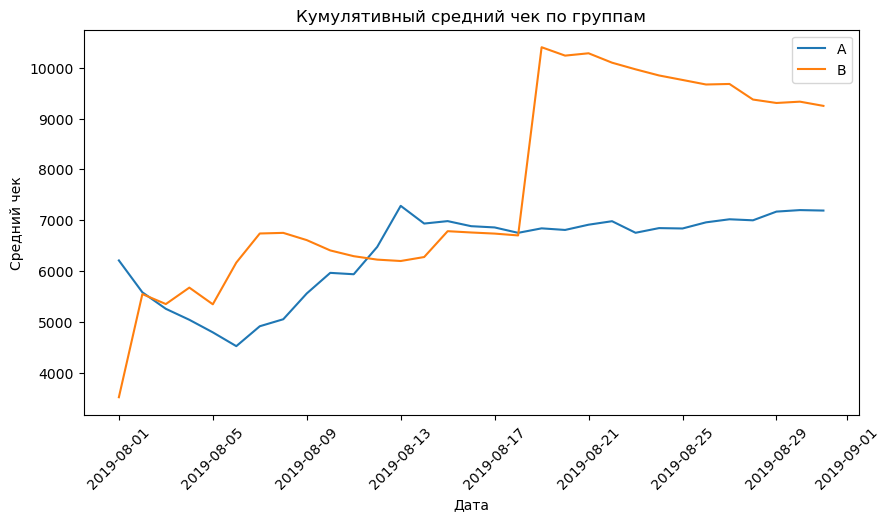

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'] / cumulative_a['orders'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'] / cumulative_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

Средний чек обеих групп выравнивается после 13.08. Однако, в очередной раз видим, что по группе В есть крупная покупка после 17.08 и после неё чек этой группы начинает снижаться.

In [25]:
# подготовим таблицу для графика относительного изменения кумулятивного среднего чека и построим график
merged_cumulative = cumulative_a.merge(cumulative_b, on=['date'],suffixes=('_a', '_b'))

In [26]:
merged_cumulative.sample()

,date,revenue_a,orders_a,visitors_a,revenue_b,orders_b,visitors_b
19,2019-08-20,2103613,309,12204,3768059,368,12218


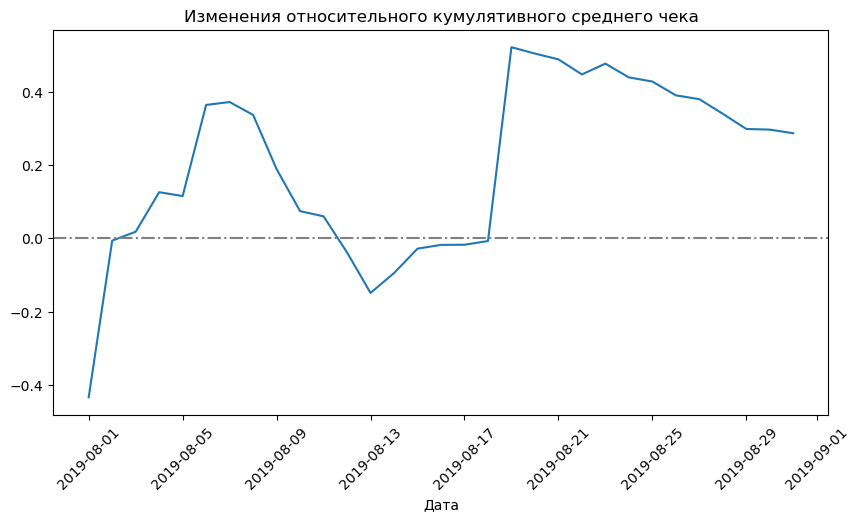

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['revenue_b'] / merged_cumulative['orders_b']) / (merged_cumulative['revenue_a'] / merged_cumulative['orders_a']) -1
)
plt.xticks(rotation=45)
plt.title('Изменения относительного кумулятивного среднего чека')
plt.xlabel('Дата')
#plt.axis(ymin=-0.5, ymax=0.6)
plt.axhline(y=0, color='grey', linestyle='-.');

Очередное подтверждение того, что где-то прячутся крупные заказы. Однако отмечу, что раньше думал что они только где-то после 17.08, теперь думаю что они могут быть и в начале.

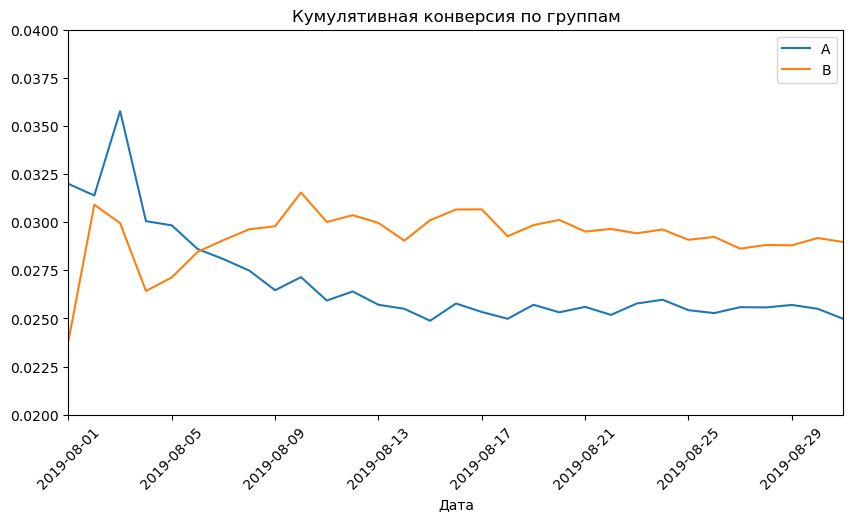

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['orders'] / cumulative_a['visitors'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['orders'] / cumulative_b['visitors'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная конверсия по группам')
plt.axis(xmin=cumulative_a['date'].min(), xmax=cumulative_a['date'].max(), ymin=.020, ymax=0.04)
plt.xlabel('Дата')
plt.legend();

Получился интересный результат, на первых этапах конверсия в обеих группах "прыгала", но потом выровнялась, и по графику видно, что группа В лидирет.

Разница между группами порядка 0.2% в абсолютном значение

In [29]:
merged_cumulative.sample()

,date,revenue_a,orders_a,visitors_a,revenue_b,orders_b,visitors_b
1,2019-08-02,234381,42,1338,221801,40,1294


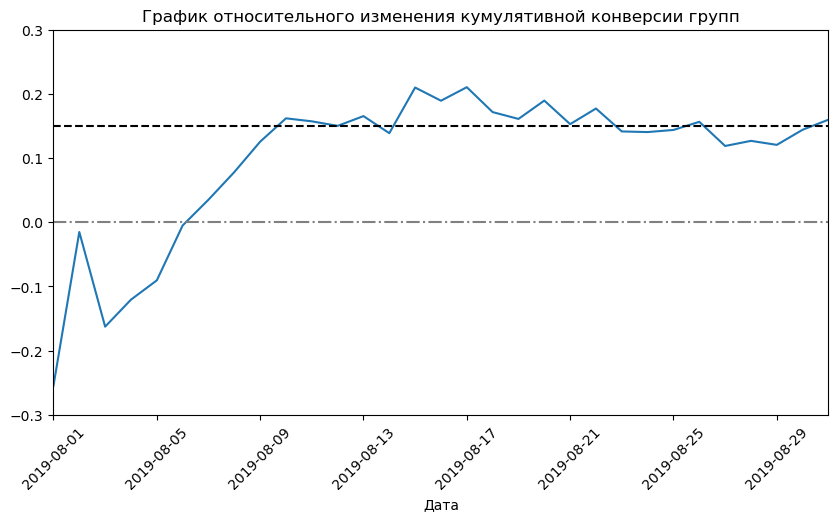

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['orders_b'] / merged_cumulative['visitors_b']) / (merged_cumulative['orders_a'] / merged_cumulative['visitors_a']) -1
)
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии групп')
plt.axis(xmin=merged_cumulative['date'].min(), xmax=merged_cumulative['date'].max(), ymin=-0.30, ymax=0.3)
plt.axhline(y=0, color='grey', linestyle='-.')
plt.xlabel('Дата')
plt.axhline(y=0.15, color='black', linestyle='--');

Группа B брала разгон в начале теста, и теперь стабильно и существенно обгоняет группу А

Пришло время изучить аномалии, как было отмечено ранее, у нас наверняка есть аномально дорогие заказы. Со стоимости заказов и начнем.

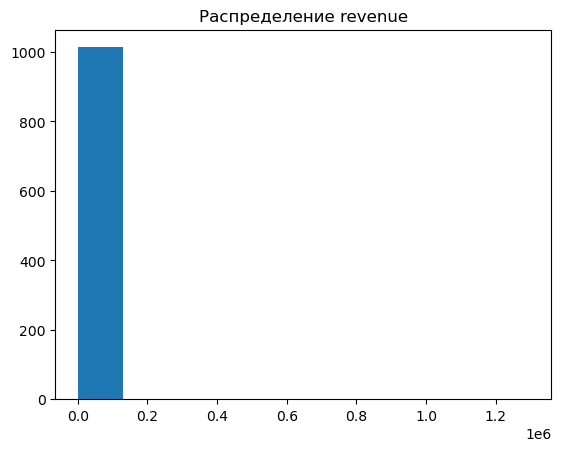

In [31]:
plt.hist(orders['revenue'])
plt.title('Распределение revenue');

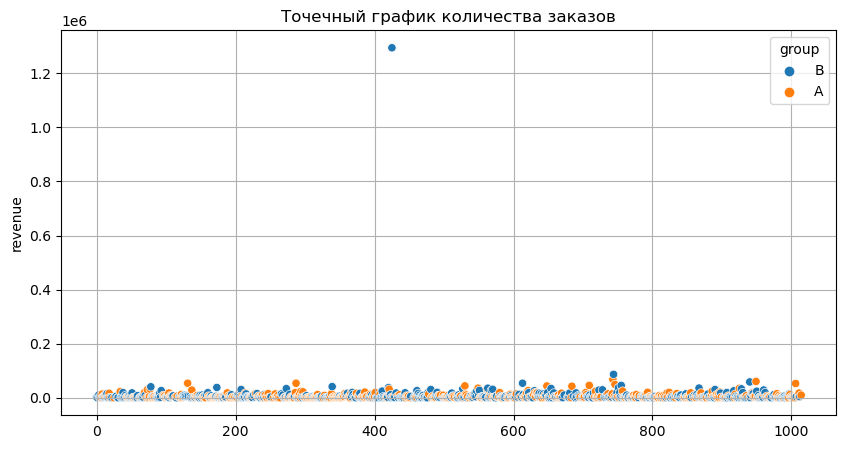

In [32]:
x_values = pd.Series(range(0,orders['revenue'].count())) # сериес для 

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y="revenue", hue="group",
                     data=orders)
plt.grid()
plt.title('Точечный график количества заказов');

Вот оно, как и было отмечено ранее, средний чек и выручка по группе В сильно увеличивается за счет всего одного заказа. Посмотри еще чуть детальнее

[26785. 53904.]


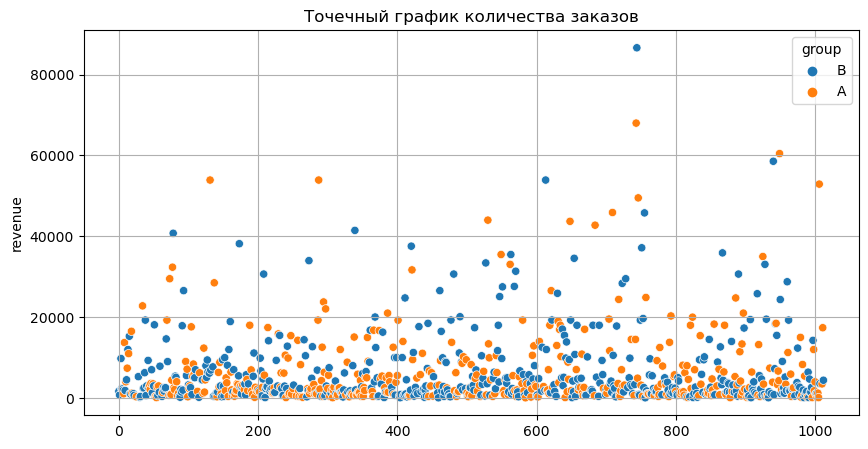

In [33]:
orders_clean = orders.query('revenue<200000')
x_values = pd.Series(range(0,orders_clean['revenue'].count())) # сериес для оси Х
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y="revenue", hue="group",
                     data=orders_clean)
plt.grid()
plt.title('Точечный график количества заказов');
print(np.percentile(orders['revenue'], [95, 99]))

Тут уже все не так плохо, по этому принимаю решение убрать все что выше 99 перцентиля.

In [34]:
per_99 = np.percentile(orders['revenue'], [99])[0]
orders_clean = orders.query('revenue<= @per_99')

In [35]:
orders_by_users = (orders.groupby('visitorId')['revenue'].count()
                   .reset_index()
                   .rename(columns={'revenue':'orders'}))

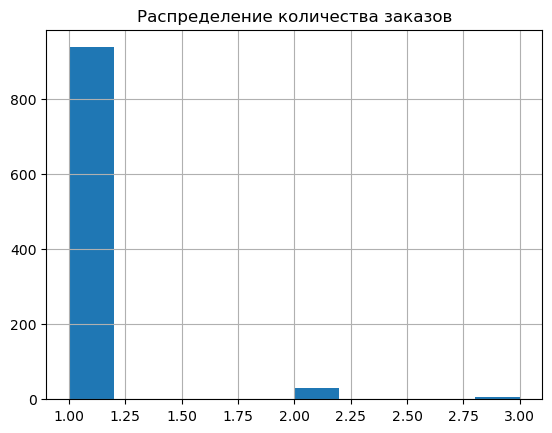

In [36]:
orders_by_users['orders'].hist()
plt.title('Распределение количества заказов');

В основном клиенты делают 1, намного реже, 2 заказа и совсем редко 3.

[1. 2.]


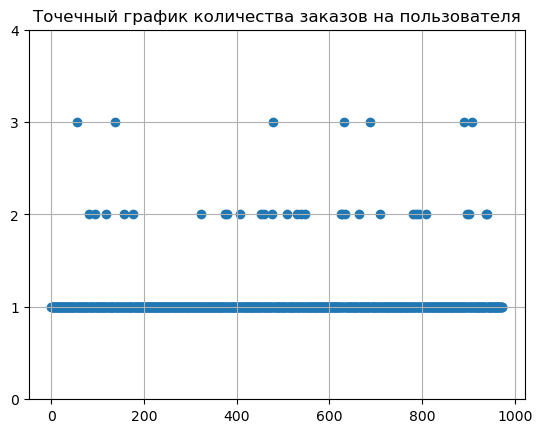

In [37]:
x_values = pd.Series(range(0,orders_by_users['orders'].count())) # сериес для оси х
plt.scatter(data=orders_by_users, x=x_values, y='orders') 
plt.grid()
plt.title('Точечный график количества заказов на пользователя')
plt.yticks([0,1,2,3,4]);
print(np.percentile(orders_by_users['orders'], [95, 99]))

Основываясь на графике принимаем решение, что больше 2 заказов это уже перебор. Уберем таких пользователей.

In [38]:
per_99 = np.percentile(orders_by_users['orders'], [99])[0]
orders_by_users_clean = orders_by_users.query('orders<= @per_99')

In [39]:
orders_clean = orders_clean.loc[orders_clean['visitorId'].isin(orders_by_users_clean['visitorId'])]

Вывод:

Таким образом были изучены сырые данные и подготовлена таблица с данными заказов без аномалий. С учетом аномалий группа В казалась предпочтительнее, однако у неё были найдены серьезные аномалии. От которых мы благополучно избавились. Перейдем к заключительной части, постараемся наверняка узнать какая из групп предпочтительнее.

Часть 4. Статистическая значимость.

Сырые данные.


Соберем все данные по заказам и визитам (а также добавим кумулятивные показатели) в одну таблицу. Для этого создадим несколько таблиц и затем объединим их:

In [40]:
visitors.head(2)


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [41]:
orders.head(2)


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [42]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Собираю все в одну таблицу

In [43]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
29,2019-08-30,9,78180,21,209223,460,3311413,531,4955833,490,490,18037,18198
17,2019-08-18,13,59581,7,35323,278,1876741,327,2190865,668,737,11127,11171


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [44]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.011
Относительный показатель 'B' и 'A' = 0.160


*Вывод: p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 16.8%

In [45]:
#посмотрим сколько посетители делают определенное кол-во заказов
sampleA.value_counts() , sampleB.value_counts()

(0    18291
 1      427
 2       13
 3        5
 Name: orders, dtype: int64,
 0    18388
 1      510
 2       16
 3        2
 Name: orders, dtype: int64)

Очищенные данные

Ранее уже была подготовлена таблица с "чистыми" заказами, испольуем её и код для сырых данных.

In [46]:
# таблицы с данными по заказам на каждого пользователя (очищенная)
# по хорошему, можно дополнить старые название таблицы приставкой, например, _clean
# но для экономии времени делать этого не буду
orders_by_usersA = orders_clean[orders_clean['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders_clean[orders_clean['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

In [47]:
freeloadersA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_usersA['orders'])), name='orders')
freeloadersB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_usersB['orders'])), name='orders')


In [48]:
# создаем выборки с чистыми данными для стат тестов
sampleA = pd.concat([orders_by_usersA['orders'], freeloadersA])
sampleB = pd.concat([orders_by_usersB['orders'], freeloadersB])

In [49]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Средняя конверсия (очищенная) группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия (очищенная) группы B: {:.1%}'.format(sampleB.mean()))


p_value: 0.00695
Средняя конверсия (очищенная) группы А: 2.4%
Средняя конверсия (очищенная) группы B: 2.8%


На очищенных данных ситуация с конверсией почти не изменилась, только конверсия немного уменьшилась. Группа В, по прежнему, в лидерах по конверсии. Отвергаем H0 о равенстве конверсий.



In [50]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'])[1]
))
print('Средний чек (очищенный) группы А: {:.2f}'.format(orders_clean[orders_clean['group']=='A']['revenue'].mean()))
print('Средний чек (очищенный) группы B: {:.2f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()))

p_value: 0.78770
Средний чек (очищенный) группы А: 6487.02
Средний чек (очищенный) группы B: 6277.27


Такая же ситуация с тестом и по среднему чеку, мы по прежнему не можем отвергнуть нулевую гипотезу о равенстве среднего чека. Однако, средние чеки значительно выровнялись, больше нет такой большой разницы между группа А и В по среднему чеку.

Подготовим данные для визуализации куммулитивной выручки по очищенным данным, переиспользуем код из начала тетрадки

In [51]:
orders_aggregated = (dates_groups
                     .apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date']
                                                            , orders_clean['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionId':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))
                    
orders_aggregated.rename(columns={'transactionId':'orders_clean'}, inplace=True)

visitors_aggregated = (dates_groups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                            , visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitors_aggregated.head()

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date','group'])
cumulative_data.head()



from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Построим график кумулятивной выручки по группам, предварительно изучив количество заказов в каждой из групп
cumulative_a = cumulative_data.loc[cumulative_data['group'] == 'A',['date','revenue','orders_clean','visitors']]
cumulative_b = cumulative_data.loc[cumulative_data['group'] == 'B',['date','revenue','orders_clean','visitors']]


/var/folders/1n/cv6zz_pd36l1whz8vx_0bw400000gn/T/ipykernel_21845/4070742223.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


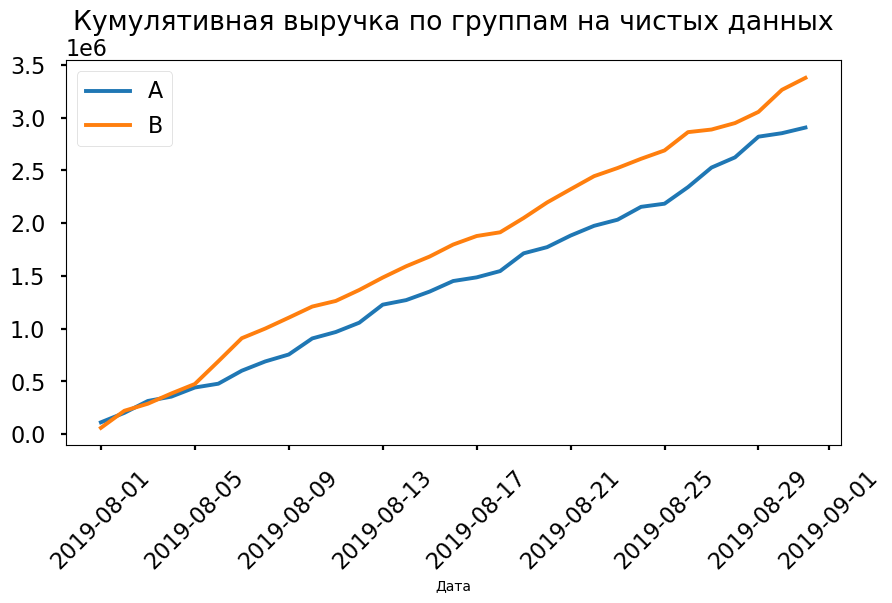

In [52]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам на чистых данных')
plt.xlabel('Дата')
plt.legend(loc='best');

В предобработке данных, я рассмотрел таблицы,поработал со стилем и привел к хорошему стилю, проверил данные на дубликаты и пропуски, изменил типы данных, где это было нужно. Подготовил данные для дальнейшего исследования. В части приоритизация гипотез предоставленных отделом Маркетинга, обращаю внимание на следующие гипотезы:

Запустить акцию, позволяющую получить скидку в день рождение
Добавить два новых канала по привлечению трафика, это позволит привлекать на 30% больше.
Добавить форму подписи, для сбора email адресов, чтобы сделать базу для рассылок В случае с ранжированием, они должны включать в себя охват пользователей интернет-магазина, то разделяю это следущим образом
Добавить форму подписи на все основные страницы, для сбора email адресов.
Сделать блоки рекомендаций товаров на сайт интернет-магазина, для повышения среднего чека и конверсии.
Добавить два новых канала привлечения трафика.

Вывод
По результатам проведенного анализа, на чистых данных, была выявлена стат значимость в конверсих двух групп, конверсия в группе В выше. И на графике выше, хоть он и на грязных данных, мы видим что конверсия группы В зафиксировалась примерно на одном уровне.

В среднем чеке групп не было найден стат значимых различий. Хоть и у группы В он немного меньше.

Учитывая что конверсия группы В больше чем у группы А и больший размер куммулитивной выручки, принимаем решение остановить тест и зафиксировать победу группы В.

PS Нужно сделать разработчикам замечание касательно того, что одни и теже клиенты попадали в разные группы, что могло повлиять на результаты.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен с решением. Тест прошел успешно! Среднее количество заказов увеличилось при отсутствии значимых изменений по среднему чеку -> выручка увеличилась, так как стали покупать чаще.
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Требуется сформулировать общий вывод с отображением всех итогов проекта, в том числе по приоритезации гипотез.

</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Все основные результаты проекта отражены👍
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (общий вывод)**
    
Филипп, мне понравилась твоя работа! Выводы хорошо структурированы и достаточно содержательны, умеешь считать перцентили, определять аномалии, качественно проводишь проверку гипотез. Спасибо за четкие комментарии по результатам исследования, аккуратный код и качественное оформление отчета! Это упростило проверку. Для принятия твоей работы нужно исправить критические недочёты:
    
* объяснить отличие фреймворков;
* оформить графики;
* полностью убрать аномальные данные (сразу по двум показателям);
* дополнить общий вывод.
    
В дополнении прикрепляю несколько полезных материалов по теме A/B-тестирования: 
    
* https://medium.com/statistics-experiments 
* https://your-scorpion.ru/ab-tests-check-mathematics/
    
Жду твою работу!
  
</div>